In [5]:
from joblib import load
import pandas as pd


df = pd.read_csv('Blocks with feature2024.csv')  

features = ['blocks_per_pool_last_10','blocks_per_pool_per_day' ,
            'is_consecutive_block', 'is_unique_miner_last_100']
new_data = df[features]


# تحميل النموذج
clf_loaded = load('decision_tree_model.joblib')

# استخدام النموذج على بيانات جديدة (يجب أن تكون بنفس هيكل بيانات التدريب)
new_data_predictions = clf_loaded.predict(new_data)


Decentralization Metrics Comparison
                 Metric  Normal Blocks  All Blocks
0       Shannon Entropy       3.456706    2.958137
1      Gini Coefficient       0.625642    0.739759
2  Nakamoto Coefficient       4.000000    2.000000
3                   HHI       0.122654    0.181964


<Figure size 1200x600 with 0 Axes>

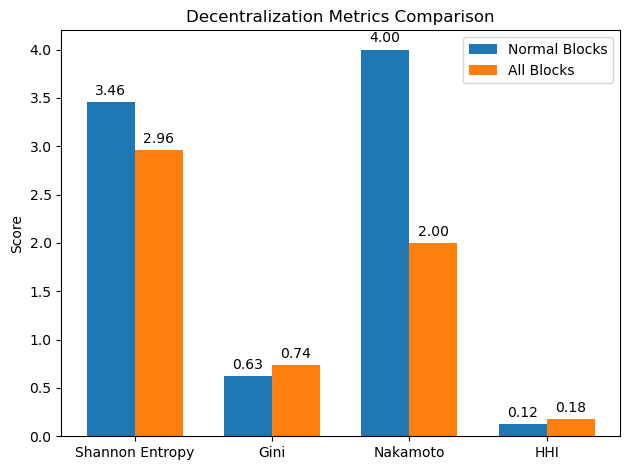


Metrics Interpretation Guide
1. Shannon Entropy: Higher = More decentralized
2. Gini Coefficient: Lower = More equal distribution (0 = perfect equality)
3. Nakamoto Coefficient: Entities needed to control 51% (Higher = More decentralized)
4. HHI: Market concentration (Lower = More decentralized, 1 = monopoly)


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data (assuming df contains block data with miner pool information)
# Make sure you have 'predicted_outlier' column from your model predictions

# If predictions not available, load model and predict
if 'predicted_outlier' not in df.columns:
    from joblib import load
    features = ['blocks_per_pool_last_10','blocks_per_pool_per_day', 
                'is_consecutive_block', 'is_unique_miner_last_100']
    X = df[features]
    clf = load('decision_tree_model.joblib')
    df['predicted_outlier'] = clf.predict(X)

# 1. Filter normal blocks (class 0)
normal_blocks = df[df['predicted_outlier'] == 0]

# 2. All blocks
all_blocks = df

# Function to calculate decentralization metrics
def calculate_metrics(data, group_col='Miner Pool Name', value_col='Value'):
    metrics = {}
    
    # Block distribution across pools
    dist = data.groupby(group_col)[value_col].sum()
    dist = dist[dist > 0]  # Remove zeros
    
    if len(dist) == 0:
        return None
    
    # Normalized probabilities
    prob = dist / dist.sum()
    
    # Shannon Entropy
    metrics['Shannon_Entropy'] = -np.sum(prob * np.log2(prob))
    
    # Gini Coefficient
    sorted_values = np.sort(dist)
    n = len(sorted_values)
    cumsum = np.cumsum(sorted_values)
    metrics['Gini'] = (n + 1 - 2 * np.sum(cumsum)/cumsum[-1]) / n
    
    # Nakamoto Coefficient
    sorted_dist = dist.sort_values(ascending=False)
    cum_share = sorted_dist.cumsum()/sorted_dist.sum()
    metrics['Nakamoto'] = (cum_share < 0.51).sum() + 1
    
    # HHI
    shares = dist/dist.sum()
    metrics['HHI'] = np.sum(shares**2)
    
    return metrics

# Calculate metrics for both groups
metrics_normal = calculate_metrics(normal_blocks)
metrics_all = calculate_metrics(all_blocks)

# Create comparison table
results = pd.DataFrame({
    'Metric': ['Shannon Entropy', 'Gini Coefficient', 'Nakamoto Coefficient', 'HHI'],
    'Normal Blocks': [
        metrics_normal['Shannon_Entropy'],
        metrics_normal['Gini'],
        metrics_normal['Nakamoto'],
        metrics_normal['HHI']
    ],
    'All Blocks': [
        metrics_all['Shannon_Entropy'],
        metrics_all['Gini'],
        metrics_all['Nakamoto'],
        metrics_all['HHI']
    ]
})

# Display results
print("\n" + "="*60)
print("Decentralization Metrics Comparison")
print("="*60)
print(results)

# Visualization
plt.figure(figsize=(12, 6))
metrics_list = ['Shannon_Entropy', 'Gini', 'Nakamoto', 'HHI']
x = np.arange(len(metrics_list))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, [metrics_normal[m] for m in metrics_list], width, label='Normal Blocks')
rects2 = ax.bar(x + width/2, [metrics_all[m] for m in metrics_list], width, label='All Blocks')

ax.set_ylabel('Score')
ax.set_title('Decentralization Metrics Comparison')
ax.set_xticks(x)
ax.set_xticklabels(['Shannon Entropy', 'Gini', 'Nakamoto', 'HHI'])
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()

# Interpretation guide
print("\n" + "="*60)
print("Metrics Interpretation Guide")
print("="*60)
print("1. Shannon Entropy: Higher = More decentralized")
print("2. Gini Coefficient: Lower = More equal distribution (0 = perfect equality)")
print("3. Nakamoto Coefficient: Entities needed to control 51% (Higher = More decentralized)")
print("4. HHI: Market concentration (Lower = More decentralized, 1 = monopoly)")


Decentralization Metrics Comparison
                 Metric  Normal Blocks  All Blocks
0       Shannon Entropy       3.831593    3.666172
1      Gini Coefficient       0.683842    0.722641
2  Nakamoto Coefficient       5.000000    4.000000
3                   HHI       0.086172    0.102234


<Figure size 1200x600 with 0 Axes>

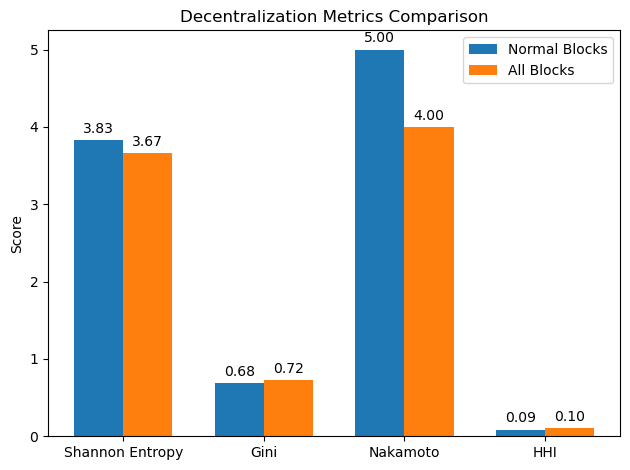


Metrics Interpretation Guide
1. Shannon Entropy: Higher = More decentralized
2. Gini Coefficient: Lower = More equal distribution (0 = perfect equality)
3. Nakamoto Coefficient: Entities needed to control 51% (Higher = More decentralized)
4. HHI: Market concentration (Lower = More decentralized, 1 = monopoly)


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data (assuming df contains block data with miner pool information)
# Make sure you have 'predicted_outlier' column from your model predictions

# If predictions not available, load model and predict
if 'predicted_outlier' not in df.columns:
    from joblib import load
    features = ['blocks_per_pool_last_10','blocks_per_pool_per_day', 
                'is_consecutive_block', 'is_unique_miner_last_100']
    X = df[features]
    clf = load('decision_tree_model.joblib')
    df['predicted_outlier'] = clf.predict(X)

# 1. Filter normal blocks (class 0)
normal_blocks = df[df['predicted_outlier'] == 0]

# 2. All blocks
all_blocks = df

# Function to calculate decentralization metrics
def calculate_metrics(data, group_col='Miner Pool Name', value_col='Value'):
    metrics = {}
    
    # Block distribution across pools
    dist = data.groupby(group_col)[value_col].sum()
    dist = dist[dist > 0]  # Remove zeros
    
    if len(dist) == 0:
        return None
    
    # Normalized probabilities
    prob = dist / dist.sum()
    
    # Shannon Entropy
    metrics['Shannon_Entropy'] = -np.sum(prob * np.log2(prob))
    
    # Gini Coefficient
    sorted_values = np.sort(dist)
    n = len(sorted_values)
    cumsum = np.cumsum(sorted_values)
    metrics['Gini'] = (n + 1 - 2 * np.sum(cumsum)/cumsum[-1]) / n
    
    # Nakamoto Coefficient
    sorted_dist = dist.sort_values(ascending=False)
    cum_share = sorted_dist.cumsum()/sorted_dist.sum()
    metrics['Nakamoto'] = (cum_share < 0.51).sum() + 1
    
    # HHI
    shares = dist/dist.sum()
    metrics['HHI'] = np.sum(shares**2)
    
    return metrics

# Calculate metrics for both groups
metrics_normal = calculate_metrics(normal_blocks)
metrics_all = calculate_metrics(all_blocks)

# Create comparison table
results = pd.DataFrame({
    'Metric': ['Shannon Entropy', 'Gini Coefficient', 'Nakamoto Coefficient', 'HHI'],
    'Normal Blocks': [
        metrics_normal['Shannon_Entropy'],
        metrics_normal['Gini'],
        metrics_normal['Nakamoto'],
        metrics_normal['HHI']
    ],
    'All Blocks': [
        metrics_all['Shannon_Entropy'],
        metrics_all['Gini'],
        metrics_all['Nakamoto'],
        metrics_all['HHI']
    ]
})

# Display results
print("\n" + "="*60)
print("Decentralization Metrics Comparison")
print("="*60)
print(results)

# Visualization
plt.figure(figsize=(12, 6))
metrics_list = ['Shannon_Entropy', 'Gini', 'Nakamoto', 'HHI']
x = np.arange(len(metrics_list))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, [metrics_normal[m] for m in metrics_list], width, label='Normal Blocks')
rects2 = ax.bar(x + width/2, [metrics_all[m] for m in metrics_list], width, label='All Blocks')

ax.set_ylabel('Score')
ax.set_title('Decentralization Metrics Comparison')
ax.set_xticks(x)
ax.set_xticklabels(['Shannon Entropy', 'Gini', 'Nakamoto', 'HHI'])
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.tight_layout()
plt.show()

# Interpretation guide
print("\n" + "="*60)
print("Metrics Interpretation Guide")
print("="*60)
print("1. Shannon Entropy: Higher = More decentralized")
print("2. Gini Coefficient: Lower = More equal distribution (0 = perfect equality)")
print("3. Nakamoto Coefficient: Entities needed to control 51% (Higher = More decentralized)")
print("4. HHI: Market concentration (Lower = More decentralized, 1 = monopoly)")